##***LAB 10 : Naive Bayes Classifier***##

  1. Binary Classification using Naive Bayes Classifier
  
  2. Sentiment Analysis using Naive Bayes

  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = "monokai",context = "notebook", ticks = True,grid = False)

##Binary Classification using Naive Bayes Classifier##

Useful References : 
1. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

2. https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

3. https://towardsdatascience.com/implementing-naive-bayes-algorithm-from-scratch-python-c6880cfc9c41

**Note : The goal of this experiment is to perform and understand Naive Bayes classification by applying it on the below dataset, you can either fill in the below functions to get the result or you can create a class of your own using the above references to perform classification**

1. Generation of 2D training data

Text(0.5, 1.0, 'Data visualization')

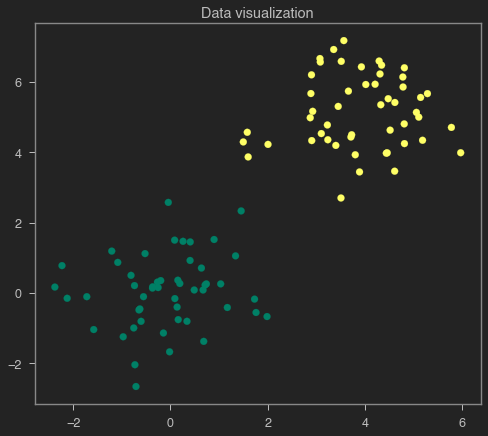

In [2]:
mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label,cmap='summer')
plt.title('Data visualization')

2. Split the Dataset by Class Values (Create a Dictionary)

In [3]:
def class_dictionary(data,label):
    class_dict = {}
    ## Write your code here
    for i in np.unique(label):
        class_dict[i] = data[label == i]
    return class_dict
dicti=class_dictionary(data,label)
# print(dicti[0][:,0])

3. Calculate Mean, Std deviation and count for each column in a dataset

In [4]:
def get_variables(class_dict):
    var_dict = {}
    ## Write your code here
    for keys in class_dict:
        var_dict[keys] = [np.mean(class_dict[keys],axis=0),np.std(class_dict[keys],axis=0),len(class_dict[keys])]
    return var_dict
get_variables(dicti)
# print(dicti1)

{0.0: [array([-0.08143074,  0.05650317]), array([0.99271046, 1.02553936]), 50],
 1.0: [array([3.89129353, 5.13647498]), array([1.02082994, 1.03546734]), 50]}

3. Calculate Class Probabilities

In [5]:
def calculate_probability(x,mean,stdev):
    exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent

def calculate_class_probabilities(summaries,row):
    probabilities = dict()
## Write your code here to calculate the class probabilities
    for keys in summaries:
        tmp=1
        p = calculate_probability(row,summaries[keys][0],summaries[keys][1])
        for i in range(p.shape[1]):
             tmp*=p[:,i]
        probabilities[keys] = tmp/len(summaries)
    return probabilities
# '''
# You can use the above function (calculate_probability) to calculate probability of an individual data point belonging to a particular class 
# based on mean and std deviation of that class

# '''
    
 

4. Test the model using some samples

Test Data Size :  20


Text(0.5, 1.0, 'Data visualization')

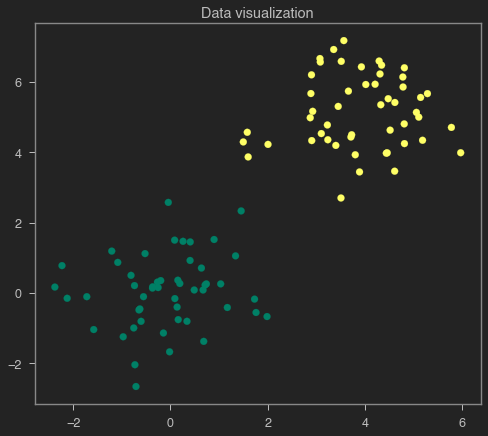

In [6]:
## Test Data Generation

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,10)
data2=np.random.multivariate_normal(mean2,var,10)
test_data=np.concatenate((data1,data2))
y_test=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))
print('Test Data Size : ',test_data.shape[0])
plt.figure()
plt.scatter(data[:,0],data[:,1],c=label,cmap='summer')
plt.title('Data visualization')

Testing for a sample point

In [7]:
class_dict = class_dictionary(data,label)
var_dict = get_variables(class_dict)
out = calculate_class_probabilities(var_dict,np.reshape(test_data[0,:],(1,2)))
print('Class Probabilites for the first sample of test dataset : ')
print(out)

Class Probabilites for the first sample of test dataset : 
{0.0: array([0.0141972]), 1.0: array([8.33297509e-16])}


**As seen above the class probability for the 1st sample is given, we can observe that probability is higher for class 0 than 1 and hence imply that this datapoint belongs to class 0**


Now Calculate the class probabilities for all the data points in the test dataset and calculate the accuracy by comparing the predicted labels with the true test labels


In [8]:
## Write your code here
p = calculate_class_probabilities(var_dict,test_data);
y_pred = p[1] > p[0]
acc = np.sum(y_pred == y_test)*100/len(y_pred)
print("Accuracy:",acc)

Accuracy: 100.0


5. Use the Sci-kit Learn library to perform Gaussian Naive Bayes classifier on the above dataset, also report the accuracy and confusion matrix for the same

Accuracy: 100.0


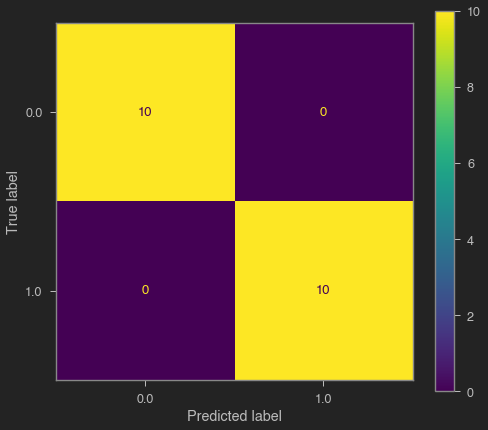

In [9]:
## Write your code here
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

gnb = GaussianNB()
y_pred = gnb.fit(data, label).predict(test_data)
print("Accuracy:",accuracy_score(y_pred,y_test)*100)
#Plotting confusion matrix
plot_confusion_matrix(gnb,test_data,y_test);

##Sentiment Analysis using Naive Bayes Classifier##

Go through the following [article](https://www.analyticsvidhya.com/blog/2021/07/performing-sentiment-analysis-with-naive-bayes-classifier/) and implement the same 

**Keypoints** : 
  
  1. The link to the dataset is given in the above article, download the same to perform sentiment analysis

  2. Understanding how to deal with text data is very important since it requires a lot of preprocessing, you can go through this [article](https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/) if you are interested in learning more about it
  
  3. Split the dataset into train-test and train the model
  
  4. Report the accuracy metrics and try some sample prediction outside of those present in the dataset


**Note : The goal of this experiment is to explore a practical use case of Naive bayes classifier as well as to understand how to deal with textual data, you can follow any other open source implemetations of sentiment analysis using naive bayes also**

Other References : 

1. https://towardsdatascience.com/sentiment-analysis-introduction-to-naive-bayes-algorithm-96831d77ac91

2. https://gist.github.com/CateGitau/6608912ca92733036c090676c61c13cd

(891, 2)
Gaussian:
Train Metrics:
Accuracy: 98.17415730337079


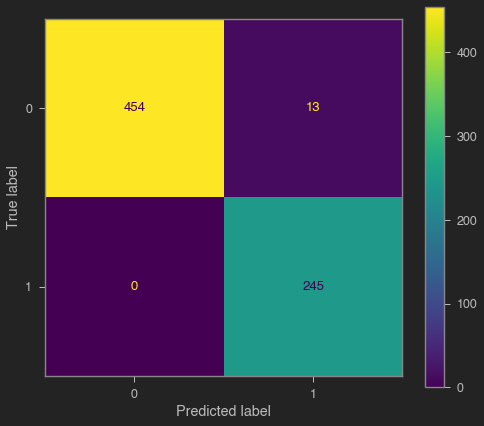

In [18]:
#Using Vectorization method

## Write your code here
def preprocess_data(data):
    # Remove package name as it's not relevant
    data = data.drop('package_name', axis=1)
    
    # Convert text to lowercase
    data['review'] = data['review'].str.strip().str.lower()
    return data

import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer
data = pd.read_csv("/Users/kushagrakhatwani/Downloads/dataset.csv")

data = preprocess_data(data)
print(data.shape)
x = data['review']
y = data['polarity']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.20, random_state=42)
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x, y)
print("Gaussian:")
print("Train Metrics:")
print("Accuracy:",model.score(x, y)*100)

plot_confusion_matrix(model,x,y);

Multinomial:
Test Metrics:
Accuracy: 81.56424581005587


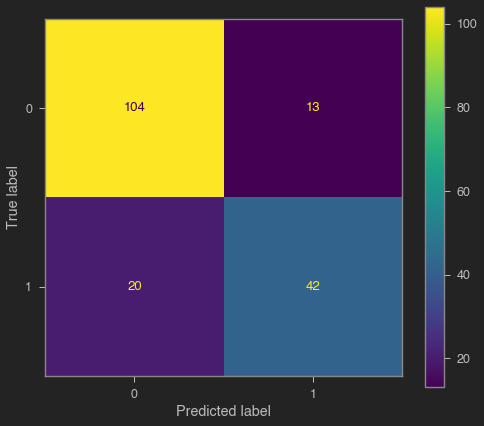

In [19]:

print("Test Metrics:")
print("Accuracy:",model.score(x_test, y_test)*100)

plot_confusion_matrix(model,x_test,y_test);

Multinomial:
Train Metrics:
Accuracy: 95.50561797752809


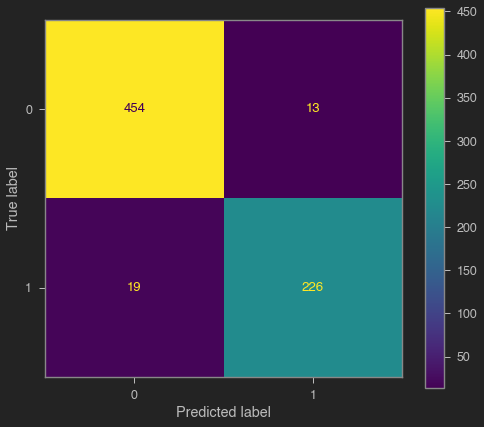

In [20]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)
print("Multinomial:")
print("Train Metrics:")
print("Accuracy:",model.score(x, y)*100)

plot_confusion_matrix(model,x,y);

Test Metrics:
Accuracy: 85.47486033519553


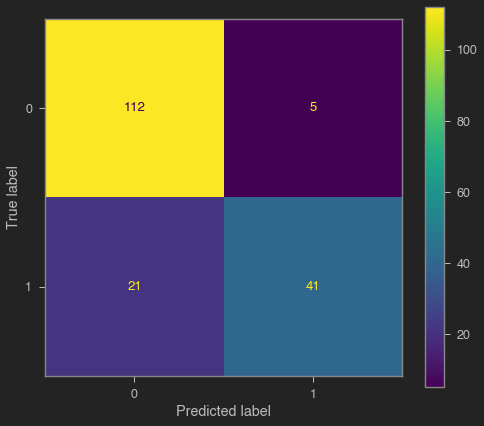

In [13]:
print("Test Metrics:")
print("Accuracy:",model.score(x_test, y_test)*100)

plot_confusion_matrix(model,x_test,y_test);

(891, 2)
Gaussian:
Train Metrics:
Accuracy: 100.0


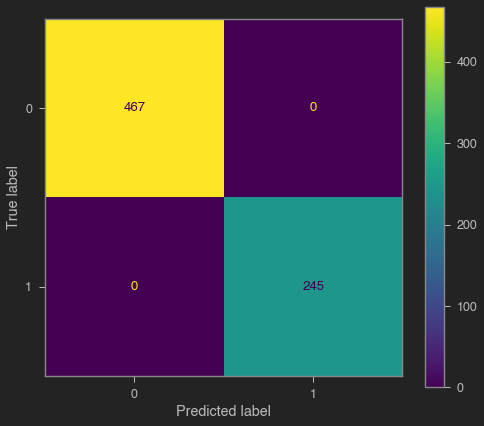

In [21]:
#Sentimental Analyis using one hot encoding

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer
data = pd.read_csv("/Users/kushagrakhatwani/Downloads/dataset.csv")

data = preprocess_data(data)
print(data.shape)
x = data['review']
y = data['polarity']
onehot_encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
onehot_encoded=onehot_encoder.fit_transform(data)

x, x_test, y, y_test = train_test_split(onehot_encoded,y, stratify=y, test_size=0.20, random_state=42)


model1 = GaussianNB()
model1.fit(x, y)
print("Gaussian:")
print("Train Metrics:")
print("Accuracy:",model1.score(x, y)*100)
plot_confusion_matrix(model1,x,y);

Test Metrics:
Accuracy: 100.0


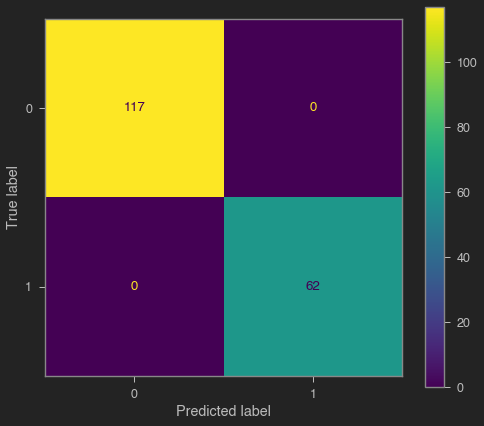

In [15]:
print("Test Metrics:")
print("Accuracy:",model1.score(x_test, y_test)*100)

plot_confusion_matrix(model1,x_test,y_test);

Multinomial:
Train Metrics:
Accuracy: 100.0


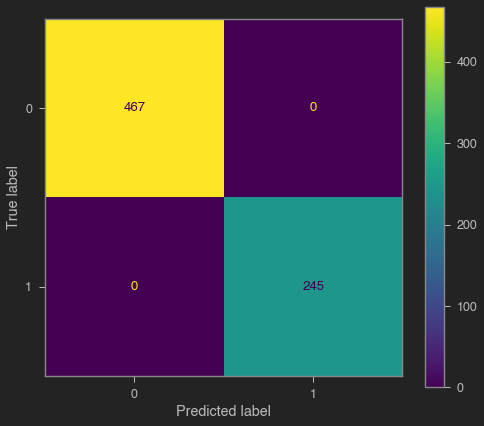

In [22]:
model1 = MultinomialNB()
model1.fit(x, y)

print("Multinomial:")
print("Train Metrics:")
print("Accuracy:",model1.score(x, y)*100)
plot_confusion_matrix(model1,x,y);

Test Metrics:
Accuracy: 100.0


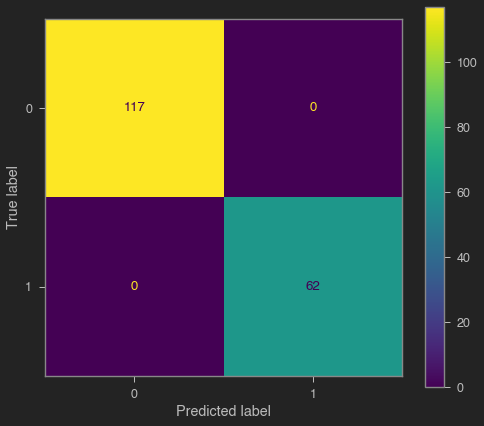

In [17]:
print("Test Metrics:")
print("Accuracy:",model1.score(x_test, y_test)*100)

plot_confusion_matrix(model1,x_test,y_test);